<a href="https://colab.research.google.com/github/contribcode/social_networks_theory_and_practice/blob/master/Social_Networks_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# imports

In [0]:
import random
import math
#from itertools import combinations

import numpy as np
float_formatter = lambda x: "%.3f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})

import pandas as pd

import networkx as nx

# graph & subgraph

In [0]:
graph = pd.read_csv('/content/drive/My Drive/Social Networks/trust.txt',
                    names=['user_1', 'user_2'],
                    delim_whitespace=True)

graph = graph.astype({'user_1': 'int32', 'user_2': 'int32'})

In [0]:
graph.head()


,user_1,user_2
0,9831,19832
1,9831,4247
2,9831,7375
3,9831,15698
4,9831,8604


number of users

In [3]:
users_df = pd.DataFrame()
users_df['user2_list'] = graph.groupby('user_1', sort=False).user_2.apply(list)
users_df['user2_nb'] = users_df.user2_list.apply(len)
users_df.head()

,user2_list,user2_nb
user_1,,
9831,"[19832, 4247, 7375, 15698, 8604, 6823, 4076, 2...",293
5369,"[5493, 12037, 15442, 796, 9222, 9140, 19885, 1...",158
6876,"[9597, 12038, 4874, 20830, 3688, 11561, 8587, ...",113
2760,"[6867, 9738, 21552, 14526, 5323, 9140, 2318, 1...",330
20240,"[4076, 7307, 3635, 798, 19950, 333, 3167, 8406...",300


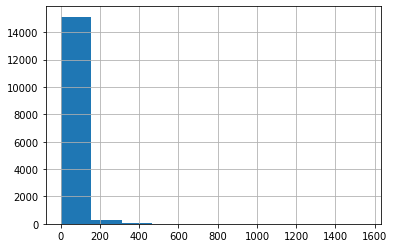

In [0]:
users_df.user2_nb.hist()

In [0]:
users_df.user2_nb.max()

1552

In [0]:
users_df.sort_values(by=['user2_nb'], ascending=False)[:20]

,user2_list,user2_nb
user_1,,
14547,"[21301, 7595, 17694, 20830, 5860, 21722, 20378...",1552
12804,"[21359, 6162, 17485, 5636, 8225, 21863, 9083, ...",1215
14309,"[11936, 15249, 3315, 10885, 17043, 12361, 1135...",999
3426,"[19878, 9071, 21722, 19016, 9248, 7156, 3485, ...",828
19837,"[19837, 15626, 6143, 5095, 20782, 5168, 7149, ...",828
18620,"[19950, 5912, 8604, 4347, 12370, 14325, 16058,...",813
22145,"[12141, 15625, 11496, 3202, 50, 7432, 15234, 1...",745
2742,"[21249, 21007, 12037, 15373, 1567, 13237, 7479...",714
5670,"[10757, 17493, 19672, 1896, 3635, 12783, 15422...",706


In [0]:
graph.user_1.unique().shape

(15449,)

In [0]:
graph.user_2.unique().shape

(15868,)

select 500 users

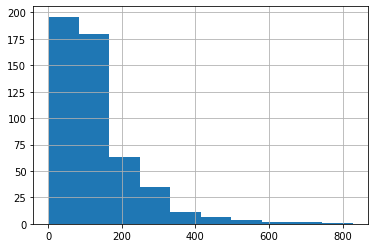

In [4]:
subgraph_nodes = users_df.index.tolist()[:500]
users_df.loc[subgraph_nodes].user2_nb.hist()

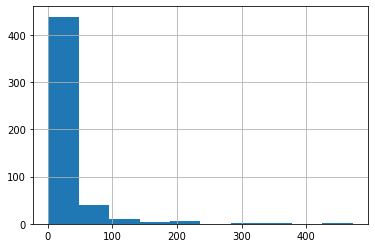

In [0]:
idx = np.random.choice(users_df.shape[0], 500, replace=False)
graph_nodes_rand = users_df.index.values[idx].tolist()
users_df.loc[graph_nodes_rand].user2_nb.hist()

In [0]:
'''
graph[graph.isin({'user_1': al, 'user_2': al}).all(axis='columns')]
'''

,user_1,user_2
73,9831,2831
30186,2831,9831
161835,7057,9831


**sub graph of 500 users**

In [0]:
subgraph = graph[graph.user_1.isin(subgraph_nodes)]

In [6]:
subgraph.shape

(66250, 2)

In [7]:
subgraph.user_1.unique().shape

(500,)

# ratings

In [8]:
rating_with_timestamp = pd.read_csv('/content/drive/My Drive/Social Networks/'
                                    'rating_with_timestamp.txt',
                                    names=['user_id', 
                                           'product_id', 
                                           'category_id', 
                                           'rating',
                                           'helpfulness',
                                           'time_stamp'],
                                    delim_whitespace=True)

rating_df = pd.DataFrame()
rating_df = rating_with_timestamp[['user_id', 'category_id', 'rating']]
rating_df = rating_df.astype({'user_id': 'int32',
                              'category_id': 'int32',
                              'rating': 'int32'})
rating_df.head()

,user_id,category_id,rating
0,1,3,2
1,1,2,2
2,1,3,2
3,1,3,5
4,1,3,3


mean rating for every user and category

In [9]:
user_categoty_group_rating = \
  rating_df.groupby(['user_id', 'category_id']).mean()
user_categoty_group_rating['rating'] = \
  user_categoty_group_rating.rating.apply(lambda v: round(v, 3))
user_categoty_group_rating.head()

rating
user_id category_id        
1       2             2.000
        3             2.750
        11            4.000
2       2             4.000
        3             3.286

In [10]:
# get the values of the first level index (category_id)
category_ids = user_categoty_group_rating.index.get_level_values('category_id')

# set index just to user_id
user_categoty_group_rating.index = \
  user_categoty_group_rating.index.get_level_values(0)

# put the values of the index into a cilumn
user_categoty_group_rating['category_id'] = category_ids

# re-oreder coumn values
user_categoty_group_rating = user_categoty_group_rating[['category_id', 
                                                         'rating']]
user_categoty_group_rating.head()

,category_id,rating
user_id,,
1,2,2.000
1,3,2.750
1,11,4.000
2,2,4.000
2,3,3.286


In [11]:
user_ratings = pd.DataFrame()
user_ratings['ratings'] = \
  user_categoty_group_rating\
  .groupby('user_id')\
  .apply(lambda r: dict(zip(r['category_id'], r['rating'])))

print(user_ratings.shape)
user_ratings.head()

(22164, 1)


,ratings
user_id,
1,"{2: 2.0, 3: 2.75, 11: 4.0}"
2,"{2: 4.0, 3: 3.286, 4: 2.5, 5: 4.5, 10: 4.0, 11..."
3,"{1: 4.0, 2: 5.0, 9: 5.0, 10: 5.0, 11: 3.8, 13:..."
4,"{3: 4.0, 4: 3.0, 5: 4.111, 7: 3.0, 10: 3.5, 17..."
5,"{4: 4.5, 11: 5.0, 17: 5.0, 19: 4.0}"


# influence probabilities

take out users that have no ratings


In [0]:
users_ratings_list = rating_df.user_id.unique().tolist()

subgraph = subgraph[subgraph.isin(
    {'user_1': users_ratings_list, 'user_2': users_ratings_list})\
    .all(axis='columns')]


In [0]:
def influence_probs(user_1, user_2):

  infl_dict = dict()

  # get ratings
  ratings_user1 = user_ratings.loc[user_1].iloc[0]
  ratings_user2 = user_ratings.loc[user_2].iloc[0]

  # get categories that have rated
  user1_categories = set(ratings_user1.keys())
  user2_categories = set(ratings_user2.keys())

  common_categories = user1_categories.intersection(user2_categories)

  # if there are no common categories then there is no influence
  if len(common_categories) == 0:
    return infl_dict

  # avoid division by zero
  eps = 1e-06

  # denominator
  denom = 0
  for cc in common_categories:
    user1_rating = ratings_user1[cc]
    user2_rating = ratings_user2[cc]
    cat_diff = abs(user1_rating - user2_rating)
    if cat_diff == 0:
      denom += 1.0 / eps
    else:
      denom += 1.0 / cat_diff

  # categories of both user_1 and user_2
  categories = user1_categories.union(user2_categories)
  # compute influence probability for every category
  for c in categories:
    if c in user1_categories:
      usr1_rating = ratings_user1[c]
    else:
      usr1_rating = 0
    if c in user2_categories:
      usr2_rating = ratings_user2[c]
    else:
      usr2_rating = 0
    numer = abs(usr1_rating - usr2_rating)
    numer += eps
    numer = 1.0 / numer
    res = round(numer / denom, 3)
    infl_dict[c] = res

  return infl_dict

In [0]:
subgraph['influence_probabilities'] =\
    subgraph.apply(lambda r: influence_probs(r.user_1, r.user_2), axis=1)

In [15]:
subgraph.head()

,user_1,user_2,influence_probabilities
0,9831,19832,"{1: 0.014, 2: 0.014, 3: 0.07, 4: 0.014, 5: 0.0..."
1,9831,4247,"{1: 0.042, 2: 0.051, 4: 0.036, 7: 0.14, 8: 0.0..."
2,9831,7375,"{1: 0.0, 3: 0.0, 4: 0.0, 7: 0.0, 8: 0.0, 9: 0...."
3,9831,15698,"{1: 0.015, 3: 0.045, 4: 0.045, 7: 0.375, 8: 0...."
4,9831,8604,"{3: 0.045, 4: 0.144, 7: 0.128, 8: 0.173, 9: 0...."


# subset of categories

In [16]:
rating_df.category_id.value_counts()

3     167263
4     102957
5      85419
19     85113
10     61503
18     55087
11     48112
2      45730
7      45459
8      45113
1      41561
9      33218
15     22926
17     21019
12     12383
22     10969
6       8739
14      6830
21      6562
13      5947
16      5475
20      3300
25       808
24       479
23       269
26        24
27         2
Name: category_id, dtype: int64

In [17]:
rating_df.category_id.value_counts().index.tolist()[:8]

[3, 4, 5, 19, 10, 18, 11, 2]

# reliable set for a category

In [31]:
category  = 10

nb_probabilistic_graphs = 3
majority = math.ceil(nb_probabilistic_graphs / 2)

reliable_sets_category = pd.DataFrame()
reliable_sets_category['user'] = subgraph.user_1.unique()
reliable_sets_category.head()

,user
0,9831
1,5369
2,6876
3,2760
4,20240


In [19]:
subgraph.head()

,user_1,user_2,influence_probabilities
0,9831,19832,"{1: 0.014, 2: 0.014, 3: 0.07, 4: 0.014, 5: 0.0..."
1,9831,4247,"{1: 0.042, 2: 0.051, 4: 0.036, 7: 0.14, 8: 0.0..."
2,9831,7375,"{1: 0.0, 3: 0.0, 4: 0.0, 7: 0.0, 8: 0.0, 9: 0...."
3,9831,15698,"{1: 0.015, 3: 0.045, 4: 0.045, 7: 0.375, 8: 0...."
4,9831,8604,"{3: 0.045, 4: 0.144, 7: 0.128, 8: 0.173, 9: 0...."


## create T probabilistic graphs

In [0]:
def keep_edge(influence_probabilities, category):
  rnd_nb = random.uniform(0, 1)
  if influence_probabilities[category] >= rnd_nb:
    return True
  else:
    return False

In [17]:
probabilistic_graphs_list = list()

for idx in range(nb_probabilistic_graphs):

  subgraph_category = subgraph[subgraph\
                               .influence_probabilities\
                               .apply(lambda v: category in v.keys())]

  subgraph_category['keep_edge'] = subgraph_category.apply(
      lambda r: keep_edge(r.influence_probabilities, category), axis=1)
  
  subgraph_category = subgraph_category[subgraph_category.keep_edge]

  probabilistic_graphs_list.append(subgraph_category)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


create nx graphs from read edges

In [0]:
probabilistic_graphs = list()

nodes_list = reliable_sets_category.user.values.tolist()

for pg in probabilistic_graphs_list:

  p_graph = nx.DiGraph()
  p_graph.add_nodes_from(nodes_list)
  p_graph.add_edges_from(list(zip(pg['user_1'], pg['user_2'])))

  probabilistic_graphs.append(p_graph)

## reliable set for each node

In [0]:
def user_reliable_set(user):

  # count how many nodes does this node reach
  nodes_reached_dict = dict()

  # for every probabilistic graph
  for idx in range(len(probabilistic_graphs)):

    probabilistic_graph = probabilistic_graphs[idx]

    nodes_reached = list(nx.dfs_preorder_nodes(probabilistic_graph,source=user))

    for nd in nodes_reached:
      if nd in nodes_reached_dict:
        nodes_reached_dict[nd] += 1
      else:
        nodes_reached_dict[nd] = 1

  temp_dict = {k:v for k, v in nodes_reached_dict.items() if v >= majority}
  nodes_reached_dict = temp_dict

  return nodes_reached_dict

In [0]:
reliable_sets_category['reliable_set'] = reliable_sets_category.user.apply(user_reliable_set)

In [33]:
reliable_sets_category.head()

,user,reliable_set
0,9831,"{9831: 3, 18724: 3, 16058: 3, 5710: 3, 9597: 3..."
1,5369,"{5369: 3, 8890: 2, 10635: 2, 15393: 2, 5493: 2..."
2,6876,"{6876: 3, 19950: 3, 12409: 3, 6137: 3, 17742: ..."
3,2760,"{2760: 3, 10308: 3, 20727: 3, 796: 3, 11477: 3..."
4,20240,"{20240: 3, 4076: 3, 1464: 3, 12036: 3, 15556: ..."
